In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/HP/Downloads/archive/predictive_maintenance.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Preprocessing the dataset

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
print(df['Failure Type'].value_counts())

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [11]:
X = df.drop(['Type','Target','Failure Type','UDI','Product ID'],axis = 1)

In [12]:
Y = df['Target']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=42)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
from sklearn.model_selection import cross_val_score
def classify(model, X, Y):
    model.fit(X_train, Y_train)
    print("Accuracy is", model.score(X_test, Y_test)*100)
    score = cross_val_score(model, X, Y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X,Y)

Accuracy is 97.18
Cross validation is 96.78999999999999


In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy is 97.61999999999999
Cross validation is 87.94000000000001


In [19]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy is 98.32
Cross validation is 88.99


In [20]:
model = ExtraTreesClassifier()
classify(model, X, Y)


Accuracy is 98.04
Cross validation is 91.16


In [21]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical variables
le = LabelEncoder()
df['Failure Type'] = le.fit_transform(df['Failure Type'])


In [23]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical variables
le = LabelEncoder()
df['Product ID'] = le.fit_transform(df['Product ID'])


In [39]:
# Check for non-numeric columns in the features
print(df.select_dtypes(include=['object']).head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [40]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


# Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[4827,   10],
       [  89,   74]], dtype=int64)

<Axes: >

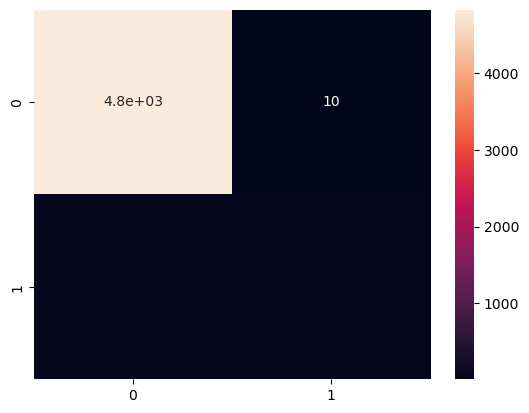

In [47]:
sns.heatmap(cm, annot=True)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a sample dataset
X, Y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)
# Make probability predictions for the first 5 samples
y_pred_proba = model.predict_proba(X[:5])

print("Probability predictions:")
print(y_pred_proba)

# Print class predictions for comparison
y_pred = model.predict(X[:5])
print("\nClass predictions:")
print(y_pred)

Probability predictions:
[[0.82 0.18]
 [0.81 0.19]
 [0.81 0.19]
 [0.82 0.18]
 [0.81 0.19]]

Class predictions:
[0 0 0 0 0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
